<div style="text-align: center;font-weight: bold; font-size:26px">European Cities Rental Market Analysis</div>

<div style="text-align: left; font-size:16px">This notebook aims to analyze Key European Cities Airbnb Data to identify trends, patterns, and factors affecting the rental prices across different cities in Europe. By examining various features such as room type, guest satisfaction, price distribution, and more, we will uncover insights that can inform rental pricing strategies, city comparisons, and other key factors influencing the Airbnb market.</div></br>
<div>
Key Questions:</br></br>
- How do rental prices vary between weekdays and weekends?</br>
  ◉ Compare the average rental prices for weekdays versus weekends. Is there a significant price difference based on the day of the week?
</br></br>
- How does room type affect rental prices?</br>
  ◉ What is the average price for different types of rooms (private rooms, shared rooms)? Are there major price differences between room types?
</br></br>
- How does the number of bedrooms influence rental prices?</br>
  ◉ Is there a correlation between the number of bedrooms and rental price? How does the price change for studio apartments versus larger units?
</br></br>
- What factors influence guest satisfaction and how do they relate to rental price?</br>
  ◉ How does the overall guest satisfaction rating correlate with rental prices? Do listings with higher guest ratings have higher prices?
</br></br>
- How does being a superhost affect rental price?</br>
  ◉ Compare rental prices between superhosts and non-superhosts. Do superhosts tend to charge higher prices for their listings?
</br></br>
- Does the number of listings a host has impact the rental price?</br>
  ◉ How do prices change for hosts with multiple listings (i.e., hosts with 2-4 offers vs. hosts with more than 4 offers)? What effect do "multi" and "biz" variables have on price?
</br></br>
- How do proximity to the city center and metro stations influence rental prices?</br>
  ◉ Is there a noticeable difference in prices between listings closer to the city center or metro stations compared to those further away?
</br></br>
- How do the attraction and restaurant indexes of the listing location affect rental prices?</br>
  ◉ How do the normalized attraction index (attr_index_norm) and restaurant index (rest_index_norm) impact the rental price? Do locations with higher indexes command higher prices?
</br></br>
- How do cities compare in terms of rental prices?</br>
  ◉ Which cities have the highest and lowest rental prices? How do factors like distance to tourist attractions or restaurants correlate with rental prices in different cities?
</br></br>
- What are the strongest predictors of rental price fluctuations?</br>
  ◉ Which factors (e.g., room type, distance to city center, guest ratings, attraction/restaurants indexes, host status) most influence price variations?
</br></br>
</div>

Data Took from: [Zenodo](https://zenodo.org/records/4446043#.Y9Y9ENJBwUE)

<div style="text-align: center;font-weight: bold; font-size:20px">1. Overview</div>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import geopandas as gpd
from shapely.geometry import Point



In [ ]:
df = pd.read_csv('European City.csv')

df.head()

df.info()

df.isnull().sum()

df.describe()

<div style="text-align: left; font-size:14px"> Here we can see that this dataset hasn't blank or error values and fit good for analysis</div>
</br>


<div style="max-width:400px;  display: block; margin-left: auto; margin-right: auto; width: 50%;">

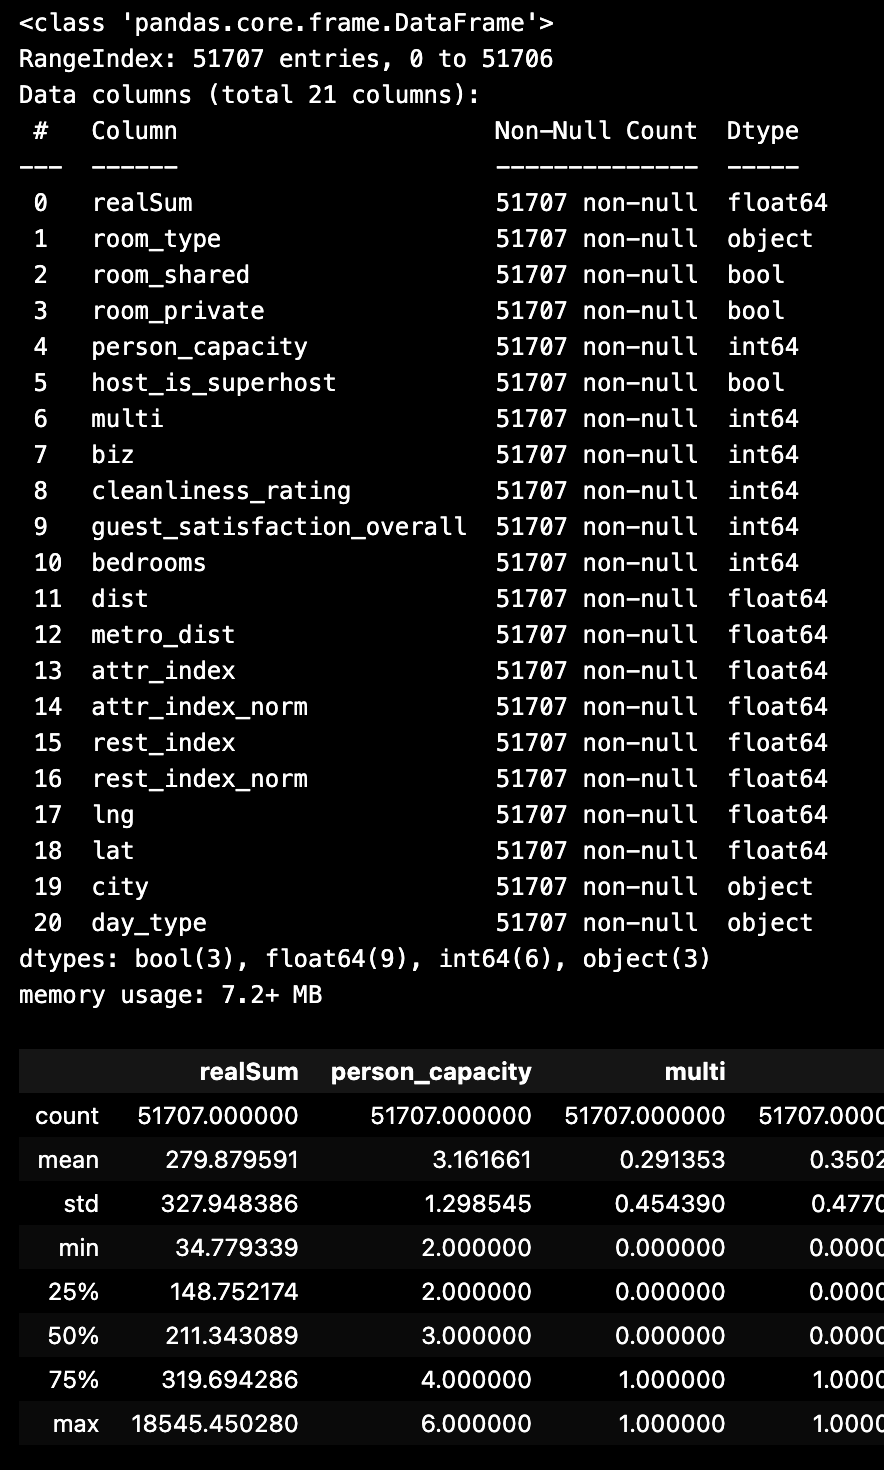

</div>

<div style="text-align: center;font-weight: bold; font-size:20px">
2. Data Cleaning
</div>

In [ ]:
#Checking data types
df.dtypes

# Correcting data types
df['day_type'] = df['day_type'].astype('category')
df['city'] = df['city'].astype('category')
df['room_type'] = df['room_type'].astype('category')

# Verifying data types
print(df.dtypes)

#Checkong rows before removing outliers
print(f'Number of rows before percentile filtering: {df.shape[0]}')

#Choosing borders
lower_bound = df['realSum'].quantile(0.01)
upper_bound = df['realSum'].quantile(0.99)

#Creating mask
outliers_mask = (df['realSum'] < lower_bound) | (df['realSum'] > upper_bound)

#Filtering regrading mask
df_cleaned_no_outliers = df[~outliers_mask]

#Checking rows after removing outliers
print(f'Number of rows after percentile filtering: {df_cleaned_no_outliers.shape[0]}')

df = df_cleaned_no_outliers


<div style="text-align: left; font-size:14px">Here we using quantile method to <b>removing outliers</b>. Percentiles allows to remove the smallest and largest 1% of the data, which is not used when working with real market data</div>

</br>

<div style="max-width:400px;  display: block; margin-left: auto; margin-right: auto; width: 50%;">

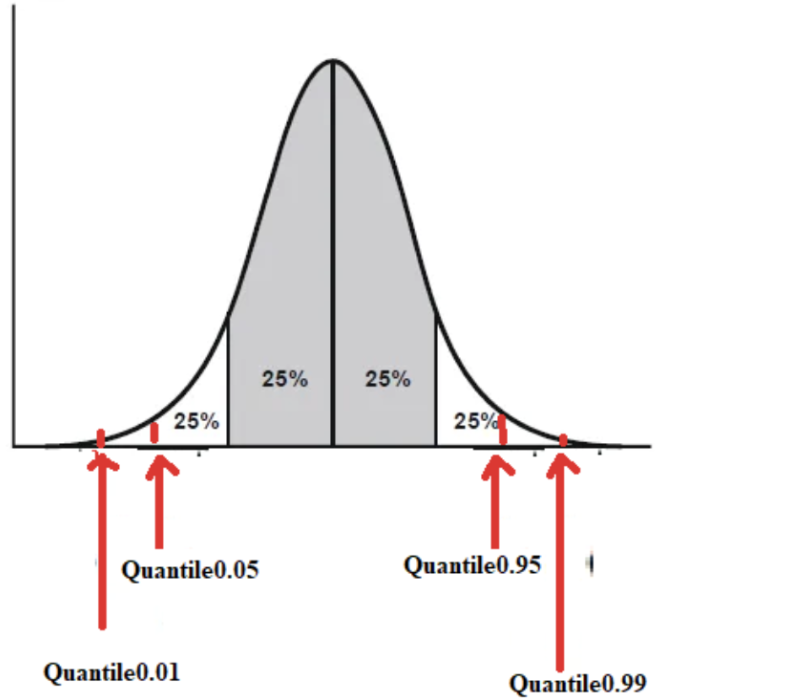

</div>

<div style="text-align: left; font-size:14px">We can see, that this dataset has 1024 outliers which were removed</div>

</br>


<div style="max-width:400px;  display: block; margin-left: auto; margin-right: auto; width: 50%;">

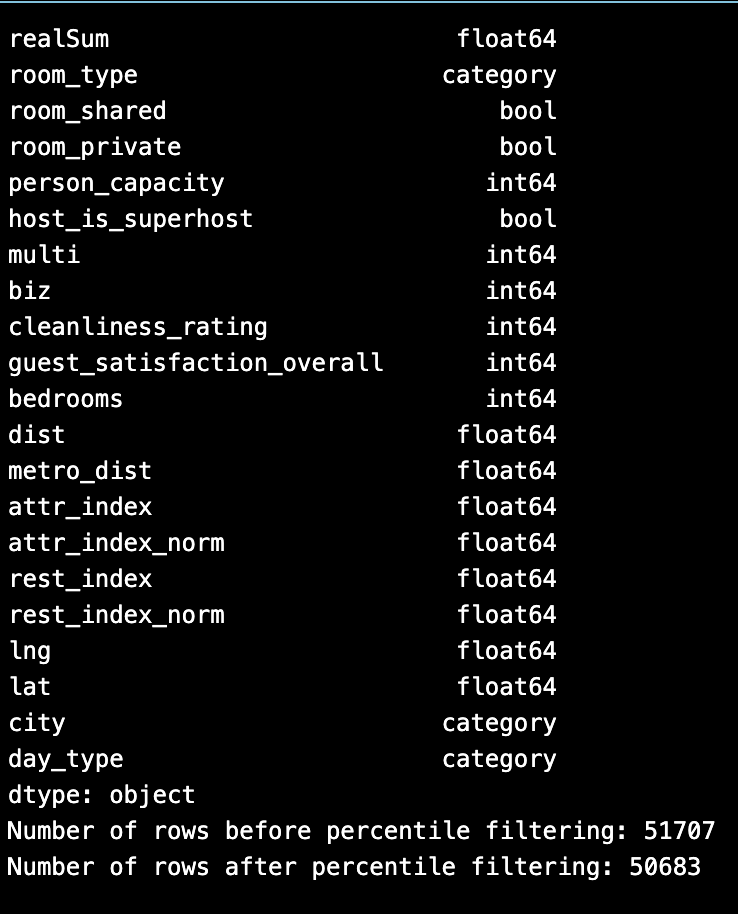

</div>


<div style="text-align: center;font-weight: bold; font-size:20px">3. Exploratory Data Analysis</div>

In [ ]:
#Histogram for price distribution
plt.figure(figsize=(10, 6))
plt.hist(df['realSum'], bins=90, color='blue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

<div style="text-align: left; font-size:14px">The histogram shows that the majority of listings in the dataset have lower prices, with a notable concentration in the lower price range (below 300 EUR). As the price increases, the frequency of listings decreases sharply, indicating that high-priced accommodations are less common. So, most bookings are likely concentrated in more affordable options.</div>
</br>

<div style="max-width:600px;  display: block; margin-left: auto; margin-right: auto; width: 50%;">

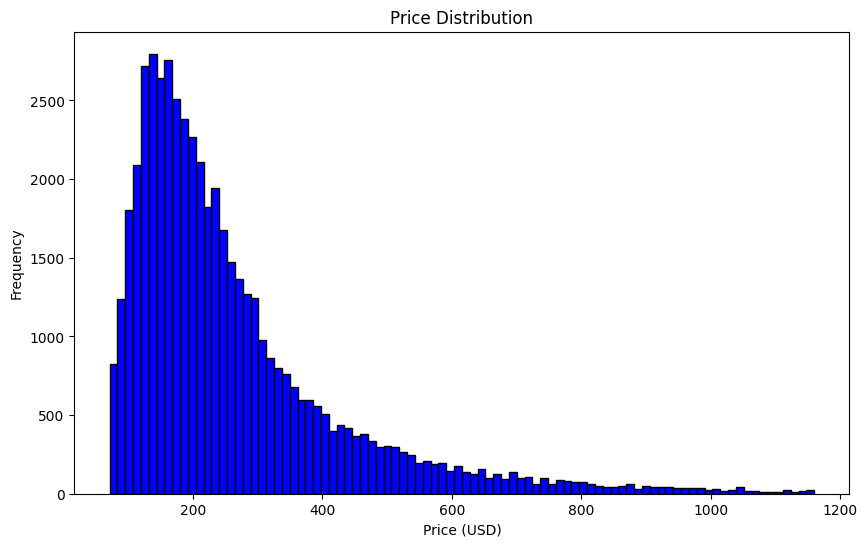

</div>



In [ ]:
#Group by day_type and calculate average price
price_by_day_type = df.groupby('day_type')['realSum'].mean()

#Bar chart to compare average prices for weekdays and weekends
plt.figure(figsize=(8, 6))
price_by_day_type.plot(kind='bar', color=['blue', 'orange'], edgecolor='black')
plt.title('Average Rental Prices: Weekdays vs Weekends')
plt.xlabel('Day Type')
plt.ylabel('Average Price (EUR)')
plt.xticks(rotation=0)
plt.show()

<div style="text-align: left; font-size:14px">The average rental prices on weekdays are slightly lower compared to weekends. This indicates that weekend bookings may be more expensive, likely due to higher demand from leisure travelers or tourists. Weekdays are typically more popular for business trips, where prices tend to be a bit lower. </div>
</br>

<div style="max-width:600px;  display: block; margin-left: auto; margin-right: auto; width: 50%;">

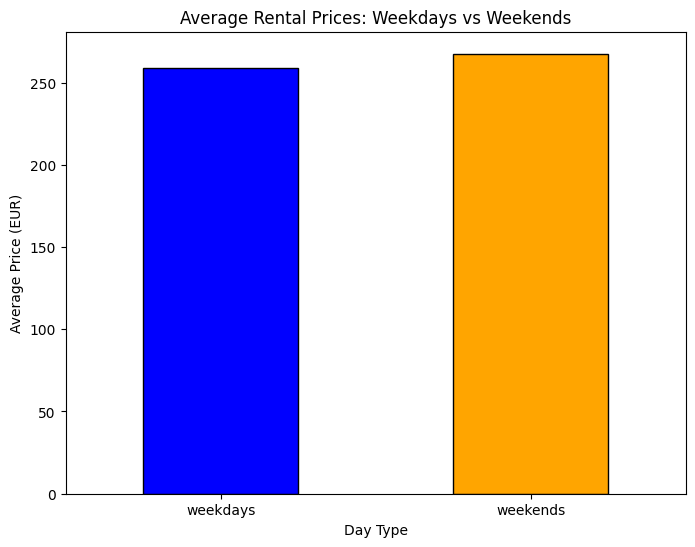

</div>



In [ ]:
#Group by room_type and calculate average price
price_by_room_type = df.groupby('room_type')['realSum'].mean()

#Bar chart for average rental prices by room type
plt.figure(figsize=(8, 6))
price_by_room_type.plot(kind='bar', color='green', edgecolor='black')
plt.title('Average Rental Prices by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price (EUR)')
plt.xticks(rotation=45)
plt.show()

<div style="text-align: left; font-size:14px">As expected, entire apartments have the highest average rental prices, followed by private rooms, and shared rooms being the least expensive.</div>
</br>

<div style="max-width:600px;  display: block; margin-left: auto; margin-right: auto; width: 50%;">

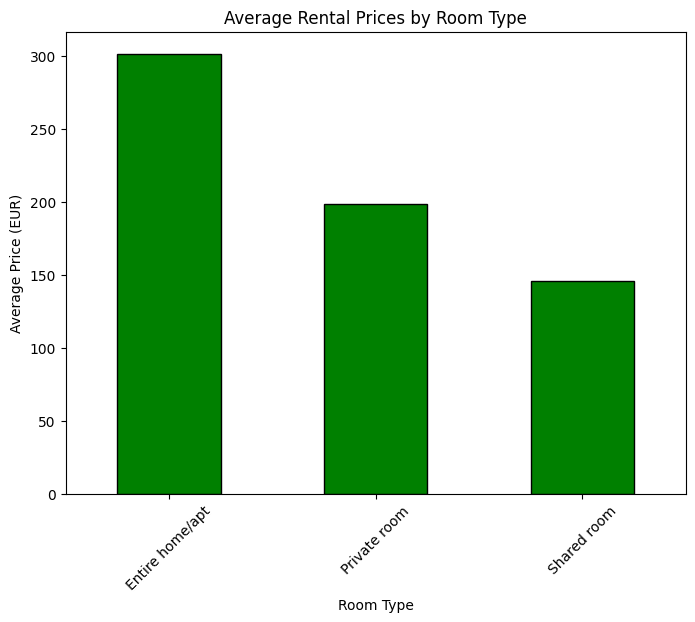

</div>



In [ ]:
#Scatter plot for price vs. number of bedrooms
plt.figure(figsize=(10, 6))
plt.scatter(df['bedrooms'], df['realSum'], alpha=0.5, color='purple')
plt.title('Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price (EUR)')
plt.show()

<div style="text-align: left; font-size:14px">The price increases as the number of bedrooms rises, which is expected. Studio apartments (0 bedrooms) are the least expensive, while listings with more bedrooms, especially 3 or more, show a marked increase in price.</div>
</br>

<div style="max-width:600px;  display: block; margin-left: auto; margin-right: auto; width: 50%;">

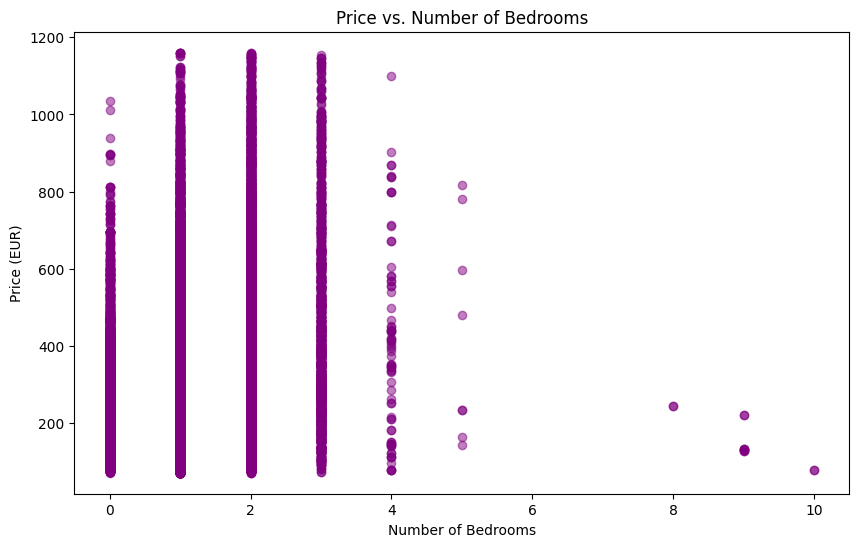

</div>


In [ ]:
#Scatter plot for guest satisfaction vs. price
plt.figure(figsize=(10, 6))
plt.scatter(df['guest_satisfaction_overall'], df['realSum'], alpha=0.5, color='red')
plt.title('Guest Satisfaction vs. Rental Price')
plt.xlabel('Guest Satisfaction Rating')
plt.ylabel('Price (EUR)')
plt.show()

<div style="text-align: left; font-size:14px">Сcorrelation is not perfectly linear. There are instances of high-priced listings with lower satisfaction ratings, indicating that price alone doesn't guarantee a positive guest experience. Other factors, such as location, host, or amenities, likely contribute to the overall satisfaction.</div>
</br>

<div style="max-width:600px;  display: block; margin-left: auto; margin-right: auto; width: 50%;">

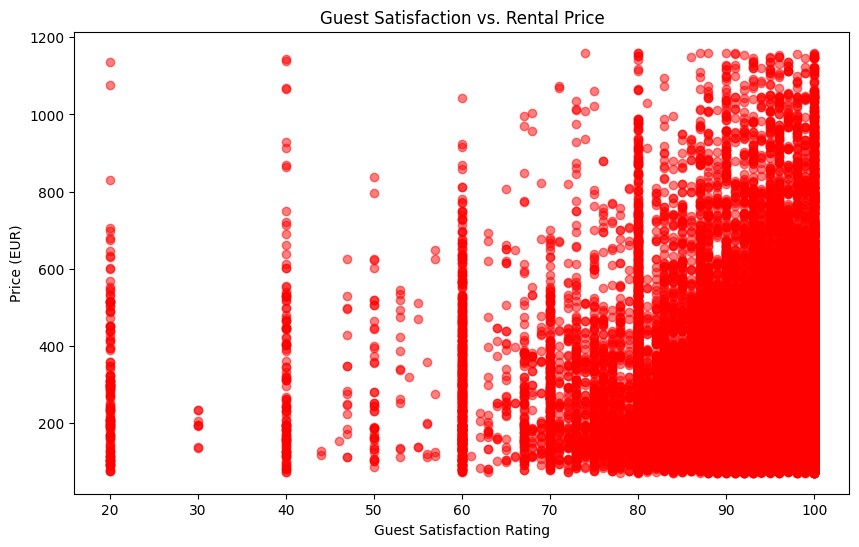

</div>


In [ ]:
# Group by superhost status and calculate average price
price_by_superhost = df.groupby('host_is_superhost')['realSum'].mean()

# Bar chart to compare average prices between superhosts and non-superhosts
plt.figure(figsize=(8, 6))
price_by_superhost.plot(kind='bar', color='cyan', edgecolor='black')
plt.title('Average Rental Prices: Superhosts vs Non-Superhosts')
plt.xlabel('Superhost Status')
plt.ylabel('Average Price (EUR)')
plt.xticks(rotation=0)
plt.show()

<div style="text-align: left; font-size:14px">Superhosts tend to charge higher rental prices compared to non-superhosts. The average price for superhost listings is noticeably higher, suggesting that the superhost status is associated with a premium on listings.</div>
</br>

<div style="max-width:600px;  display: block; margin-left: auto; margin-right: auto; width: 50%;">

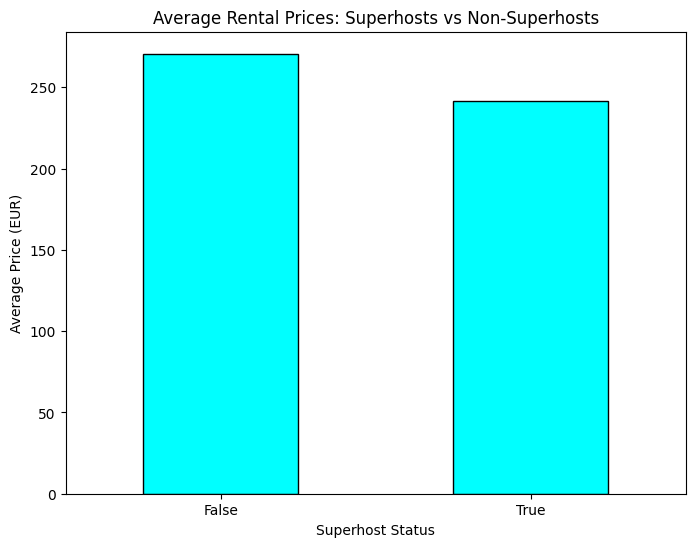

</div>
